In [1]:
import glob

In [6]:
import pandas as pd
import numpy as np

In [41]:
l = logging.getLogger()

In [49]:
l.setLevel('WARNING')

In [43]:


len(df)

len(df.columns)

len(columns)
dfs = []
for fn in glob.iglob('pts-out/*/perf-output.csv'):
    _, benchname, _ = fn.split('/')
    print(fn)
    
    try:
        df = pd.read_csv(fn, comment='#', skip_blank_lines=True,)

    except pd.errors.EmptyDataError:
        l.debug(f'Note: {fn} was empty. Skipping.')
        continue # will skip the rest of the block and move to next file
    
    



    # order inferred from documentation of perf stat; look at the CSV format section
    df.columns = [
        'timestamp',
        'value',
        'unknown0',
        'counter',
        'cycles collected',
        'percentage collected',
        'unknown1',
        'unknown2'
    ]




    assert np.all(df.unknown0.isna())
    assert np.all(df.unknown1.isna())
    assert np.all(df.unknown2.isna())
    df['workload']=benchname
    df = df[
        ['workload','timestamp','value','counter']
    ]
    dfs.append(df)

DEBUG:root:Note: pts-out/compress-lzma/perf-output.csv was empty. Skipping.
DEBUG:root:Note: pts-out/compress-pbzip2/perf-output.csv was empty. Skipping.


pts-out/sqlite/perf-output.csv
pts-out/c-ray/perf-output.csv
pts-out/mafft/perf-output.csv
pts-out/blender/perf-output.csv
pts-out/openssl/perf-output.csv
pts-out/gnupg/perf-output.csv
pts-out/redis/perf-output.csv
pts-out/compress-lzma/perf-output.csv
pts-out/ffmpeg/perf-output.csv
pts-out/asmfish/perf-output.csv
pts-out/pgbench/perf-output.csv
pts-out/compress-pbzip2/perf-output.csv
pts-out/build-linux-kernel/perf-output.csv
pts-out/encode-flac/perf-output.csv


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

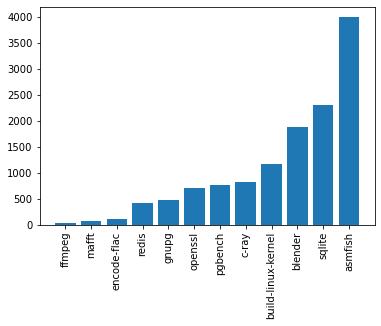

In [71]:
from matplotlib import pyplot as plt

from collections import Counter

c = Counter(df.workload)

x = c.items()

list(x)

dd = sorted(x, key=lambda a:a[1])

dd

plt.bar(*zip(*dd),)
plt.xticks(rotation=90)

In [51]:
df = pd.concat(dfs)